# Tutorial Python: Regressões lineares com sklearn

Limpar memória do Python

In [1]:
%reset -f

## Visão geral
### Porque usar o sklearn?
Nos últimos tutoriais aprendemos a fazer regressões como  pandas, que é uma ferramenta muito útil no dia-dia. Mas para utilizar algoritimos de machine learning, o melhor pacote é o sklearn. O sklearn foi construido em cima de outros pracotes pré-existentes (NumPy, SciPy e matplotlin), portanto, o pacote faz uma boa integração das funções pré-existentes.

### Porque o sklean é melhor que o pandas?
* skelarn tem melhor documentação, com exemplos práticos de como aplicar as funções presentes no pacote (disponível em: https://scikit-learn.org/stable/)
* skelarn tem maior variedade de aplicações, tais como:
  * Regression
  * Classification
  * Clustering
  * Support vector machines
  * Dimensionality reduction
* skelarn também é mais rápido que o pandas
* skelarn é famoso por ser numericalmente estavel (numerical stability).Isso quer dizer que o pacote lida bem com números com uma grande variedade de escalas. Resumidamente, se você está trabalhando com machine learning, as vezes aparece um numero muito grande ou muito pequeno. Nesses casos, se o pacote que você utiliza não for bom, o seu codigo pode "quebrar". Exemplo, imagine que você precisa multiplicar um valor por uma dada variável, e derrepente essa variável assume um valor de 0.0000001, se você arrendar esse valor para 4 casas decimais, o valor arredondado será de zero. A partir daí, qualquer valor que multiplique o padrametro, será zero também.

### Limitação do sklean
O sklean não é o melhor pacote para deeplearning. Nesses casos os melhores pacotes são:
* tensorflow https://www.tensorflow.org/learn
* keras  https://keras.io/
* PyTorch https://pytorch.org/

### Diferenças de aplicação
A maior diferença da aplicação do pandas para o sklearn é que no pandas você informa insere os dados para análise por meio de data frames enquanto no sklearn você usa arrays.


### Variações do machine learning
Existem 3 tipos de método de machine learning
* Supervisionada (Supervised)
* Não-supervisionada (Unsupervised)
* Reforço (Reinforcement)

É importante notar, que nós apenas "vemos" o aprendizado supervisionado. O modelo de aprendizado supervisioando contem uma ou mais variáveis preditoras (inputs) e uma variável resposta (output). 

## Carregar pacotes necessário 

In [2]:
# Como foi dito anteriormente, o sklearn foi construido em cima dos pacotes: NumPy, pandas, matplotlib and seaborn. Portanto vamos carregar esses pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Adicionalmente, vamos carregar o seaborn para gerar gráficos interessantes para ilustrar esse tutorial
import seaborn as sns
sns.set()

# Para completar, para aplicarmos nosso primeiro modelo a ser aplicado em  machine learning, vamos carregar o sklearn
from sklearn.linear_model import LinearRegression # O modulo LinearRegression vai trazer todas as ferramentas que vamos precisar para fazer nossos primeiros modelos de regressão linear no sklearn

## Carregue o banco de dados
Aqui usaremos o conjunto de dados publicado por Biagolini-Jr. et al 2021 https://doi.org/10.1007/s00265-021-03015-2. Esse conjunto de dados consiste em dados de filmagem de display de Tiziu registradas em Brasília/DF, coletadas em duas áreas.

Carregar os dados seguindo o mesmo procedimento usado nos outros tutoriais:

In [3]:
dados = pd.read_excel('Dados_Biagolini-Jr_et_al_2021.xlsx')
nonPAD = dados[dados["Disturbance"] == 0]
nonPAD.head()

,DisplayId,Location,nLeaps,LeapDuration,LeapRate,Nseeds,ShadowIntensity,VegetationDensity,Disturbance,Truck,...,LakeDistance,DawnTime,DayYear,Nest20,Nest10,RecordTime,RecordDate,BreedingSeason,Longitude,Latitude
0,D01,ar,18,683.777778,14.826012,2329.680000,2.179201,0.211558,0,0,...,576.506757,0.9411,30,No,No,06:36:00,2018-01-31,2017_2018,-47.872075,-15.755073
1,D02,ar,17,440.176471,16.131743,506.400000,0.407589,0.184022,0,0,...,631.899508,1.5911,30,No,No,07:15:00,2018-01-31,2017_2018,-47.872535,-15.755306
2,D03,ar,16,372.375000,17.113520,435.600000,1.352319,0.092675,0,0,...,568.246695,2.3411,30,No,No,08:00:00,2018-01-31,2017_2018,-47.872656,-15.754348
3,D04,co,18,510.111111,19.144863,950.733333,1.612304,0.268500,0,0,...,246.435504,1.3769,18,No,No,06:55:00,2018-01-19,2017_2018,-47.856289,-15.761616
4,D05,co,14,432.000000,15.084536,842.940000,0.504573,0.301722,0,0,...,231.269427,1.5103,18,No,No,07:03:00,2018-01-19,2017_2018,-47.856148,-15.761477


Veja a descrição geral do novo conjunto de dados

In [4]:
nonPAD.describe()

,nLeaps,LeapDuration,LeapRate,Nseeds,ShadowIntensity,VegetationDensity,Disturbance,Truck,Fire,Mower,BorderDistance,RoadDistance,LakeDistance,DawnTime,DayYear,Longitude,Latitude
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,19.589744,464.049740,14.121309,497.740071,1.768495,0.334628,0.0,0.025641,0.153846,0.179487,86.085695,232.430726,409.479839,2.621797,52.461538,-47.866115,-15.757153
std,8.349970,69.785181,2.805358,438.218596,1.095031,0.108133,0.0,0.160128,0.365518,0.388776,45.235166,144.164528,229.672620,1.348704,19.005326,0.008630,0.003812
min,11.000000,318.772727,7.320644,0.000000,0.256048,0.092675,0.0,0.000000,0.000000,0.000000,7.988528,29.696078,11.245272,0.798100,18.000000,-47.874406,-15.764221
25%,15.000000,415.995215,12.401862,266.130000,0.926267,0.262368,0.0,0.000000,0.000000,0.000000,48.870137,122.838805,185.780428,1.527200,33.500000,-47.873101,-15.760967
50%,18.000000,450.905660,14.826012,375.240000,1.581984,0.347358,0.0,0.000000,0.000000,0.000000,96.152144,166.642358,545.096972,2.072500,59.000000,-47.872535,-15.755073
75%,22.000000,507.149306,16.001096,628.320000,2.519705,0.408062,0.0,0.000000,0.000000,0.000000,116.770096,376.626299,594.312593,3.832500,64.000000,-47.857048,-15.754148
max,53.000000,683.777778,19.144863,2329.680000,4.781968,0.604560,0.0,1.000000,1.000000,1.000000,160.362508,476.253447,715.202997,5.643300,78.000000,-47.852807,-15.752316


Definir suas variáveis dependente e intependente

In [5]:
# Variável independente (= independente variable input = feature)
x = nonPAD ['DawnTime'] # Taxa de saltos (numero de saltos/minuto)
# Variável dependente (= dependente variable output = target)
y = nonPAD ['LeapRate'] # Horário relativo da gravação (quantas horas se passaram desde o alvorecer

O sklearn lida apenas com matrizes, portanto temos que redimencionar o objeto para ele se tornar uma matriz. Nesse tutorial é necessário fazer esse ajuste, porque temos apenas 1 variável preditora. Os programadores que desenvolveram o sklearn previram que os usuários iriam na maior parte das vezes usar o programa com diversas variáveis preditoras. Por isso, mais a frente, quando formos fazer modelos mais complexos, não precisaremos nos preocupar com isso.

In [6]:
x_matrix = x.values.reshape(-1,1) # Codigo para redmencionar o objeto como uma matriz
x_matrix.shape # Esse codigo vai mostrar quantas (linhas, Colunas) sua matriz tem:

(39, 1)

## Regressão linear

Vamos agora rodar o modelo de regressão propriamente dito

In [7]:
reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1) # Esse codigo irá criar um objeto chamado reg, que vai estar vazio, mas é definido como LinearRegression class
type(reg) # veja

sklearn.linear_model._base.LinearRegression

Os parametros da função LinearRegression, são:
* fit_intercept = Informa ao algoritmos que ele deve calcular um valor de intercept0 (que seria o B0 no nosso exemplo)
* normalize = Faz a padronização automaticamente do nosso conjunto de dados
* copy_X = Se verdadeiro, o sklearn faz uma copia de x antes de fazer a normalização, de forma a não correr risco de mudar a estrutura do x original
* n_jobs = número de CPU que devem ser usadas para essa analise. Se for definido como "None" o pacote vai operar da mesma forma que se tivesse sido definido "=1". Ou seja, vai rodar o codigo em só 1 CPU.

In [8]:
reg.fit(x_matrix,y) # Codigo para ajustar a regressão, onde a primeira variável representa os inputs, e a segunda o target.

LinearRegression(n_jobs=1)

### R-quadrado

In [9]:
reg.score(x_matrix,y)

0.1890094854158213

### Coeficientes

In [10]:
reg.coef_

array([-0.904302])

### Intercepto

In [11]:
reg.intercept_

16.492205459027897

### Fazer previsões
Peveja qual é a distância até a rodovida de um poleiro que está a 50 m da borda

In [12]:
new_data = pd.DataFrame(data=[.5,1,1.5],columns=['DawnTime']) # Crie o conjunto de dados que você deseja prever
new_data

,DawnTime
0,0.5
1,1.0
2,1.5


Para sistematizar a criação de um numero de valores maiores, veja o codigo a seguir

In [13]:
new_data = pd.DataFrame(data=np.arange(0.5, 5.5, 0.5),columns=['DawnTime']) # Crie o conjunto de dados que você deseja prever
new_data

,DawnTime
0,0.5
1,1.0
2,1.5
3,2.0
4,2.5
5,3.0
6,3.5
7,4.0
8,4.5
9,5.0


In [14]:
reg.predict(new_data) # Código para previsão dos valores

array([16.04005446, 15.58790345, 15.13575245, 14.68360145, 14.23145045,
       13.77929944, 13.32714844, 12.87499744, 12.42284644, 11.97069543])

Para criar um data frame com relação de valores previstos, faça:

In [15]:
new_data['Predicted_LeapRate'] = reg.predict(new_data)
new_data

,DawnTime,Predicted_LeapRate
0,0.5,16.040054
1,1.0,15.587903
2,1.5,15.135752
3,2.0,14.683601
4,2.5,14.231450
5,3.0,13.779299
6,3.5,13.327148
7,4.0,12.874997
8,4.5,12.422846
9,5.0,11.970695


###  Plotar as relações observadas
Como nossos plots são feitos pelo pacote seaborn, nada muda em relação ao nosso outro tutorial

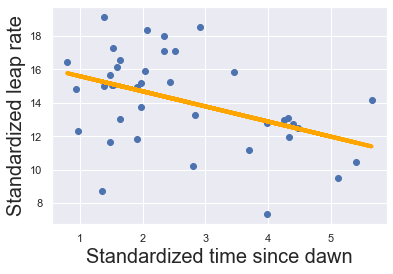

In [16]:
plt.scatter(x,y) # Fazer o plot
yhat = reg.coef_*x_matrix + reg.intercept_  # Reta de regressão 
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line') # Inserir a reta de regressão no gráfico
plt.xlabel('Standardized time since dawn', fontsize = 20) # Renomear eixo x
plt.ylabel('Standardized leap rate', fontsize = 20) # Renomear eixo y
plt.show() # Mostrar o plot